# Topic 1 Introduction to Deep Learning

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())

tf.test.gpu_device_name()

Version:  2.6.0
Eager mode:  True


'/device:GPU:0'

# Topic 2 Introduction to Neural Network

### Prepare the data

In [3]:
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"                     
dataset = pd.read_csv(dataset_path)
dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
dataset = dataset.dropna()

In [5]:
x_train = dataset.sample(frac=0.7,random_state=0)
x_test = dataset.drop(x_train.index)

In [6]:
y_train = x_train.pop('medv')
y_test = x_test.pop('medv')

In [7]:
x_train = (x_train - x_train.mean())/(x_train.max()-x_train.min())
x_test = (x_test - x_test.mean())/(x_test.max()-x_test.min())

### Build the model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=[len(x_train.keys())]))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))

In [10]:
optimizer = tf.keras.optimizers.RMSprop(lr=0.001)
model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### Visualize the Model

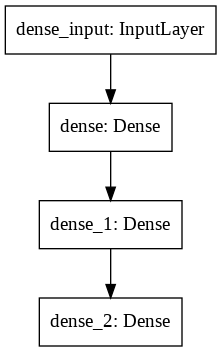

In [12]:
keras.utils.plot_model(model, 'my_first_model.png')

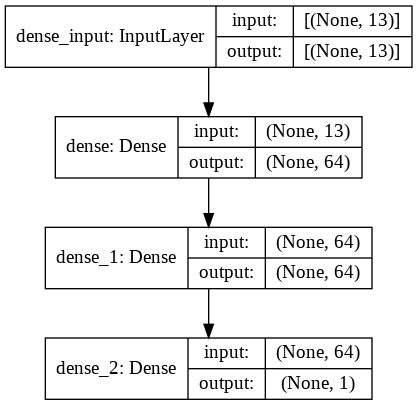

In [13]:
keras.utils.plot_model(model, 'model.png', show_shapes=True)

### Train the model

In [14]:
EPOCHS = 100
history = model.fit(x_train, y_train,epochs=EPOCHS,shuffle=True, validation_data=(x_test,y_test))

Epoch 1/100
12/12 [==============================] - 3s 25ms/step - loss: 564.7309 - mae: 22.0537 - mse: 564.7309 - val_loss: 593.9166 - val_mae: 22.2523 - val_mse: 593.9166
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 535.8719 - mae: 21.4042 - mse: 535.8719 - val_loss: 559.9188 - val_mae: 21.5010 - val_mse: 559.9188
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 500.8065 - mae: 20.5878 - mse: 500.8065 - val_loss: 513.9649 - val_mae: 20.4828 - val_mse: 513.9649
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 455.4312 - mae: 19.5042 - mse: 455.4312 - val_loss: 461.5875 - val_mae: 19.2472 - val_mse: 461.5875
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 403.5203 - mae: 18.1970 - mse: 403.5203 - val_loss: 398.3471 - val_mae: 17.6550 - val_mse: 398.3471
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 343.3835 - mae: 16.5444 - mse: 343.3835 - val_loss: 327.9168 

### Evaluate the model

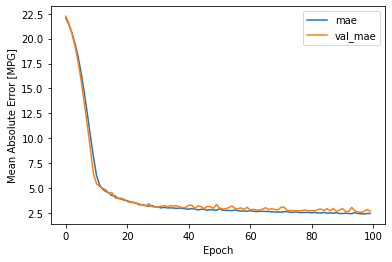

In [15]:
mae = history.history['mae']
val_mae = history.history['val_mae']
epoch = range(len(mae))

import matplotlib.pyplot as plt

plt.plot(epoch,mae,label='mae')
plt.plot(epoch,val_mae,label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error [MPG]')
plt.legend()
plt.show()

In [16]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)
print("Testing Mean Abs Error: {:5.2f}".format(mae))

5/5 - 0s - loss: 14.4003 - mae: 2.6642 - mse: 14.4003
Testing Mean Abs Error:  2.66


### Make Prediction

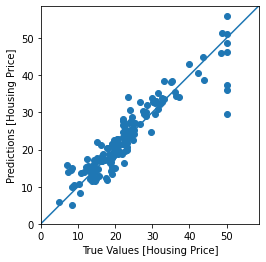

In [17]:
y_hat = model.predict(x_test).flatten()

plt.scatter(y_test, y_hat)
plt.xlabel('True Values [Housing Price]')
plt.ylabel('Predictions [Housing Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([0, 100], [0, 100])






### Save the Model in HDF5 Format

In [18]:
model.save("regression.h5")

### Load the Model

In [19]:
new_model = keras.models.load_model('regression.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### Save the Model in SavedModel Format

In [20]:
model.save("regression/1/")

INFO:tensorflow:Assets written to: regression/1/assets


In [21]:
new_model = keras.models.load_model('regression/1/')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### Save and Load Weights

In [22]:
# Save the weights
model.save_weights('./regression/1/w')

# Restore the weights
model.load_weights('./regression/1/w')


### Exercise: Predictive Regression Model

In [23]:
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
                     
dataset = pd.read_csv(dataset_path)
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [24]:
dataset = dataset.dropna()
dataset.pop('species')
dataset

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
x_train = dataset.sample(frac=0.7,random_state=0)
x_test = dataset.drop(x_train.index)

In [26]:
y_train = x_train.pop('sepal_width')
y_test = x_test.pop('sepal_width')

In [27]:
x_train = (x_train - x_train.mean())/(x_train.max()-x_train.min())
x_test = (x_test - x_test.mean())/(x_test.max()-x_test.min())

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=[len(x_train.keys())]))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))

In [30]:
myoptimizer = tf.keras.optimizers.RMSprop(lr=0.001)
model.compile(loss='mse',optimizer=myoptimizer,metrics=['mae', 'mse'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 3,425
Trainable params: 3,425
Non-trainable params: 0
_________________________________________________________________


In [32]:
EPOCHS = 100
history = model.fit(x_train, y_train,epochs=EPOCHS,shuffle=True, validation_data=(x_test,y_test))

Epoch 1/100
4/4 [==============================] - 1s 74ms/step - loss: 9.2363 - mae: 3.0075 - mse: 9.2363 - val_loss: 9.0076 - val_mae: 2.9729 - val_mse: 9.0076
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 8.4305 - mae: 2.8718 - mse: 8.4305 - val_loss: 8.2408 - val_mae: 2.8420 - val_mse: 8.2408
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 7.6822 - mae: 2.7406 - mse: 7.6822 - val_loss: 7.2917 - val_mae: 2.6714 - val_mse: 7.2917
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 6.7465 - mae: 2.5655 - mse: 6.7465 - val_loss: 6.2620 - val_mae: 2.4722 - val_mse: 6.2620
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 5.7628 - mae: 2.3680 - mse: 5.7628 - val_loss: 5.1982 - val_mae: 2.2463 - val_mse: 5.1982
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 4.7477 - mae: 2.1423 - mse: 4.7477 - val_loss: 4.1457 - val_mae: 1.9939 - val_mse: 4.1457
Epoch 7/100
4/4 [===========

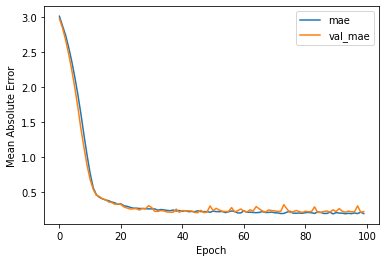

In [33]:
mae = history.history['mae']
val_mae = history.history['val_mae']
epoch = range(len(mae))

import matplotlib.pyplot as plt

plt.plot(epoch,mae,label='mae')
plt.plot(epoch,val_mae,label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [34]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)
print("Testing Mean Abs Error: {:5.2f}".format(mae))

2/2 - 0s - loss: 0.0878 - mae: 0.2252 - mse: 0.0878
Testing Mean Abs Error:  0.23


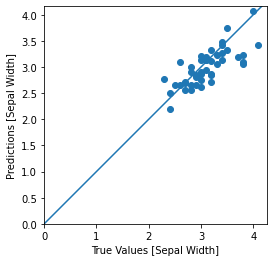

In [35]:
y_hat = model.predict(x_test).flatten()

plt.scatter(y_test, y_hat)
plt.xlabel('True Values [Sepal Width]')
plt.ylabel('Predictions [Sepal Width]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([0, 100], [0, 100])


In [36]:
model.save("iris.h5")

# tf.saved_model.save(model, "/model_iris/1/")

In [37]:
new_model = keras.models.load_model('iris.h5')

In [38]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 3,425
Trainable params: 3,425
Non-trainable params: 0
_________________________________________________________________


# Topic 3 Classification Model with Neural Network

## NN Demo on MNIST dataset

In [39]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [41]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [44]:
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test,y_test))

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2828 - accuracy: 0.9184 - val_loss: 0.1636 - val_accuracy: 0.9517
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1280 - accuracy: 0.9618 - val_loss: 0.1390 - val_accuracy: 0.9573
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0932 - accuracy: 0.9710 - val_loss: 0.1014 - val_accuracy: 0.9716
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0750 - accuracy: 0.9768 - val_loss: 0.1014 - val_accuracy: 0.9704
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0609 - accuracy: 0.9815 - val_loss: 0.0992 - val_accuracy: 0.9707
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0526 - accuracy: 0.9833 - val_loss: 0.1108 - val_accuracy: 0.9685
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0441 - accuracy: 0.9857 - val_loss: 0.0873 - val_accuracy:

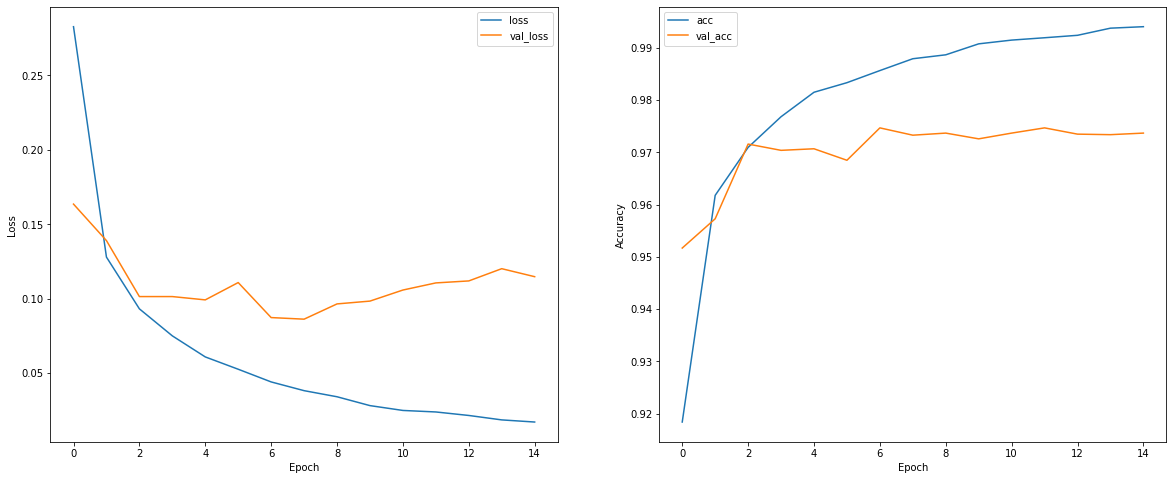

In [45]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [46]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - loss: 0.1148 - accuracy: 0.9737
Accuracy: 97.37%


In [47]:
model.save("mnist.h5")

# tf.saved_model.save(model, "/model_mnist/v1/")

In [48]:
new_model =keras.models.load_model('mnist.h5')

In [49]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


#### Sparse Cross Entropy vs Cross Entropy

In [50]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [51]:
# from keras.utils import to_categorical

y_train,y_test = tf.keras.utils.to_categorical(y_train), tf.keras.utils.to_categorical(y_test)

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [53]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [54]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [55]:
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test,y_test))

Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2938 - accuracy: 0.9160 - val_loss: 0.1690 - val_accuracy: 0.9499
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1331 - accuracy: 0.9604 - val_loss: 0.1136 - val_accuracy: 0.9666
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0943 - accuracy: 0.9713 - val_loss: 0.1010 - val_accuracy: 0.9698
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0731 - accuracy: 0.9776 - val_loss: 0.0877 - val_accuracy: 0.9739
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0593 - accuracy: 0.9817 - val_loss: 0.0861 - val_accuracy: 0.9735
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0505 - accuracy: 0.9840 - val_loss: 0.0913 - val_accuracy: 0.9727
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0407 - accuracy: 0.9871 - val_loss: 0.0886 - val_accuracy:

## Ex: NN for Fashsion MNIST dataset

In [56]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4431872/4422102 [==============================] - 0s 0us/step


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [58]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [59]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test,y_test))

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5117 - accuracy: 0.8164 - val_loss: 0.4666 - val_accuracy: 0.8341
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3713 - accuracy: 0.8643 - val_loss: 0.3808 - val_accuracy: 0.8609
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3359 - accuracy: 0.8760 - val_loss: 0.3650 - val_accuracy: 0.8665
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3147 - accuracy: 0.8833 - val_loss: 0.3505 - val_accuracy: 0.8719
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2980 - accuracy: 0.8893 - val_loss: 0.3562 - val_accuracy: 0.8721
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2823 - accuracy: 0.8944 - val_loss: 0.3445 - val_accuracy: 0.8753
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2730 - accuracy: 0.8981 - val_loss: 0.3442 - val_accuracy:

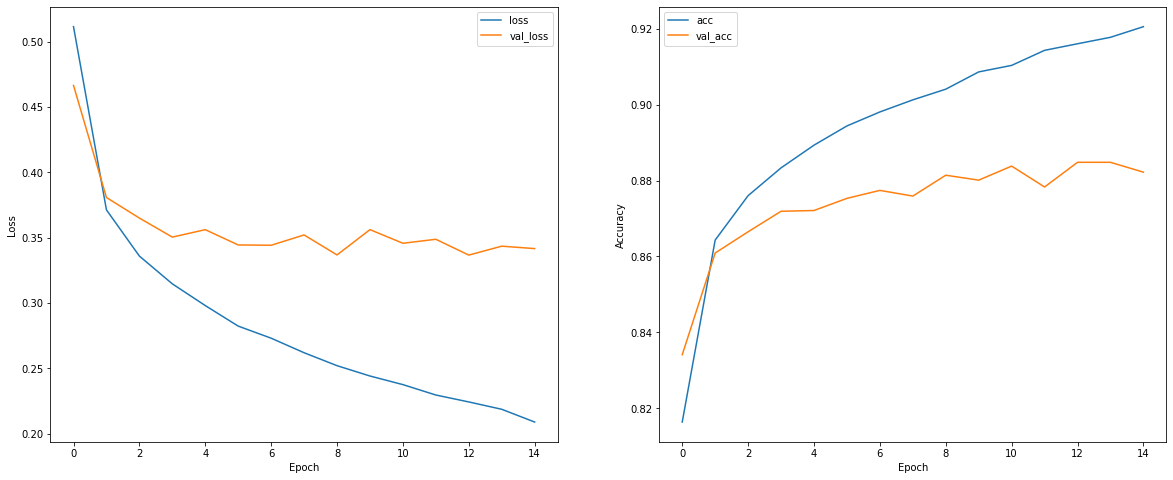

In [61]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [62]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - loss: 0.3417 - accuracy: 0.8822
Accuracy: 88.22%


In [63]:
# model.save("classifcation_model_fashion_mnist.h5")

tf.saved_model.save(model, "/model_fashion_mnist/1/")

INFO:tensorflow:Assets written to: /model_fashion_mnist/1/assets


# Topic 4  Convolutional Neural Network (CNN) 


## CNN on MNIST dataset

In [64]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [65]:
# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [66]:
x_train.shape

(60000, 28, 28, 1)

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28, 28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [68]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                100416    
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

In [69]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=15,validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 36s 5ms/step - loss: 0.1703 - accuracy: 0.9479 - val_loss: 0.0569 - val_accuracy: 0.9825
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0567 - accuracy: 0.9834 - val_loss: 0.0363 - val_accuracy: 0.9882
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0388 - accuracy: 0.9878 - val_loss: 0.0414 - val_accuracy: 0.9852
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0299 - accuracy: 0.9901 - val_loss: 0.0288 - val_accuracy: 0.9905
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0220 - accuracy: 0.9931 - val_loss: 0.0351 - val_accuracy: 0.9899
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0185 - accuracy: 0.9940 - val_loss: 0.0297 - val_accuracy: 0.9908
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0137 - accuracy: 0.9956 - val_loss: 0.0361 - val_accuracy

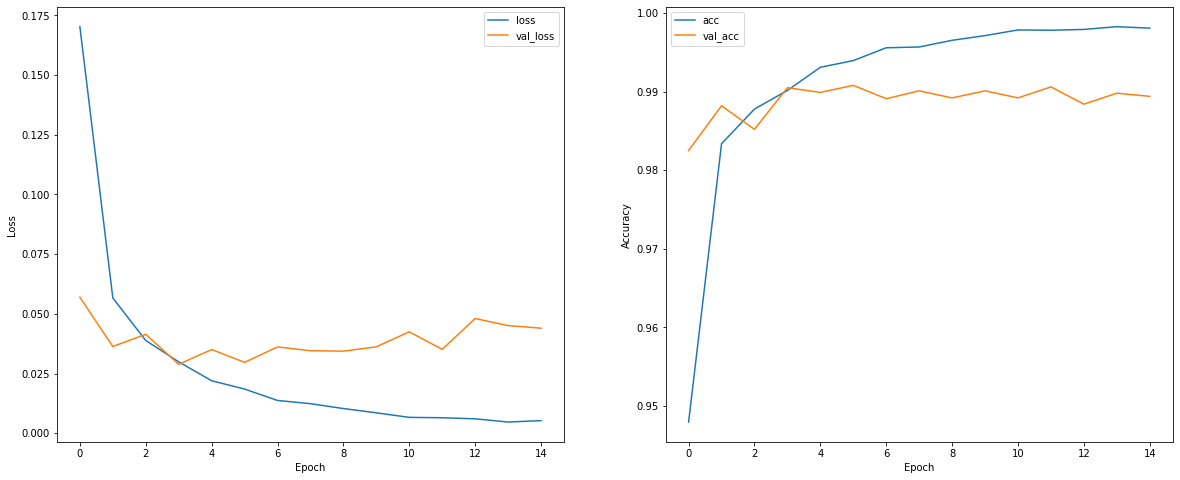

In [70]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [71]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - loss: 0.0440 - accuracy: 0.9894
Accuracy: 98.94%


## Ex: CNN for CIFAR dataset

### Import and Normalize data

In [72]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170508288/170498071 [==============================] - 6s 0us/step


In [73]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [74]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

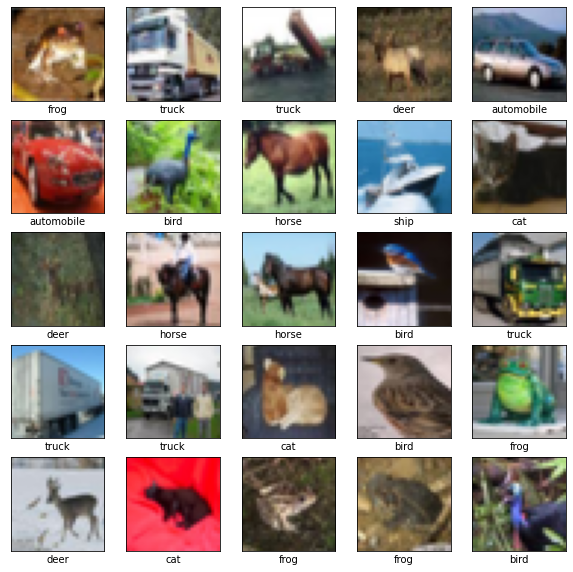

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

### Build the Model

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(32, 32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [77]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                131136    
_________________________________________________________________
dense_20 (Dense)             (None, 10)               

### Train the Model

In [78]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=15,validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4350 - accuracy: 0.4884 - val_loss: 1.1686 - val_accuracy: 0.5874
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1096 - accuracy: 0.6092 - val_loss: 1.0879 - val_accuracy: 0.6148
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9809 - accuracy: 0.6553 - val_loss: 1.0030 - val_accuracy: 0.6474
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8905 - accuracy: 0.6893 - val_loss: 0.9412 - val_accuracy: 0.6709
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8241 - accuracy: 0.7122 - val_loss: 0.9327 - val_accuracy: 0.6758
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7661 - accuracy: 0.7327 - val_loss: 0.9194 - val_accuracy: 0.6775
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7121 - accuracy: 0.7489 - val_loss: 0.9118 - val_accuracy:

### Evaluate the Model

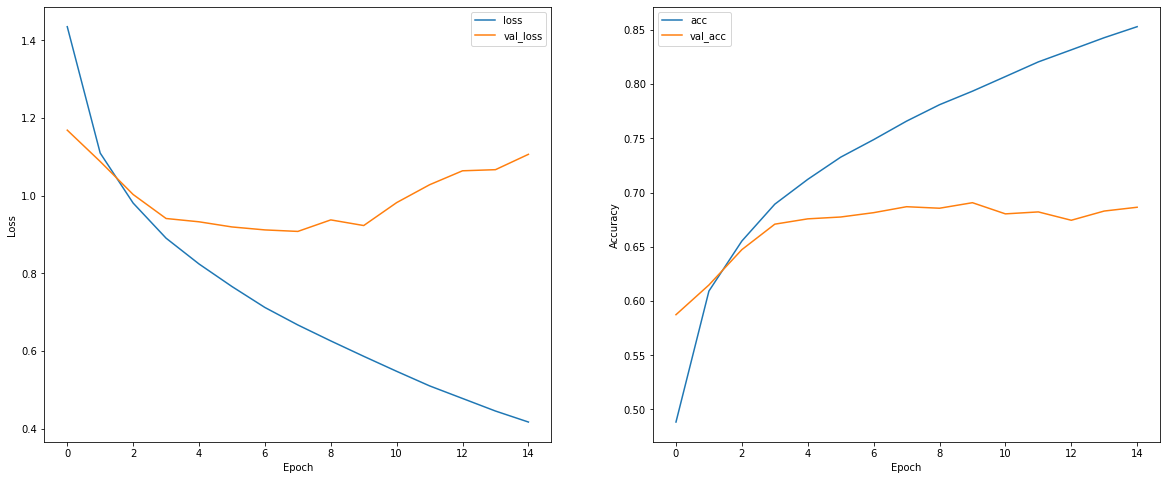

In [79]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [80]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - loss: 1.1064 - accuracy: 0.6865
Accuracy: 68.65%


## CNN on Small Dataset: Cats and Dogs

### Import the data

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [82]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68616192/68606236 [==============================] - 1s 0us/step


In [83]:
PATH

'/root/.keras/datasets/cats_and_dogs_filtered'

In [84]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [85]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [86]:
print(train_cats_dir)
print(train_dogs_dir)
print(validation_cats_dir)
print(validation_dogs_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [87]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [88]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

### ImageDataGenerator

In [89]:
train_image_generator = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 

In [90]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Visualize the raw images 

In [91]:
sample_training_images, _ = next(train_data_gen)

In [92]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

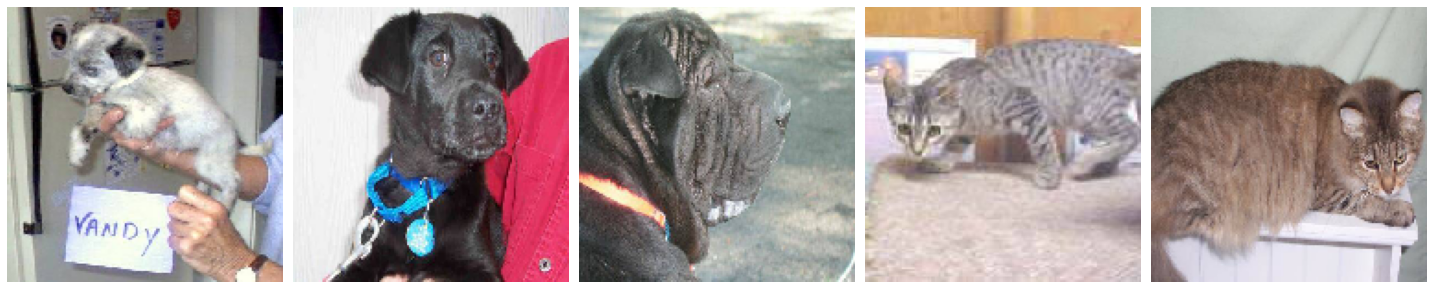

In [93]:
plotImages(sample_training_images[:5])

### Build the Model

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

### Train the Model

In [95]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_original = model.fit(train_data_gen,epochs=epochs,validation_data=val_data_gen)

Epoch 1/15
16/16 [==============================] - 17s 881ms/step - loss: 0.7864 - accuracy: 0.5030 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 2/15
16/16 [==============================] - 10s 643ms/step - loss: 0.6923 - accuracy: 0.5200 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 3/15
16/16 [==============================] - 10s 644ms/step - loss: 0.6906 - accuracy: 0.5315 - val_loss: 0.6794 - val_accuracy: 0.6200
Epoch 4/15
16/16 [==============================] - 10s 645ms/step - loss: 0.6781 - accuracy: 0.5810 - val_loss: 0.6647 - val_accuracy: 0.5390
Epoch 5/15
16/16 [==============================] - 10s 644ms/step - loss: 0.6580 - accuracy: 0.5820 - val_loss: 0.6431 - val_accuracy: 0.5910
Epoch 6/15
16/16 [==============================] - 10s 643ms/step - loss: 0.6239 - accuracy: 0.6370 - val_loss: 0.5924 - val_accuracy: 0.6800
Epoch 7/15
16/16 [==============================] - 10s 644ms/step - loss: 0.5896 - accuracy: 0.6875 - val_loss: 0.6157 - val_accuracy: 0.6690

### Evaluate the Model

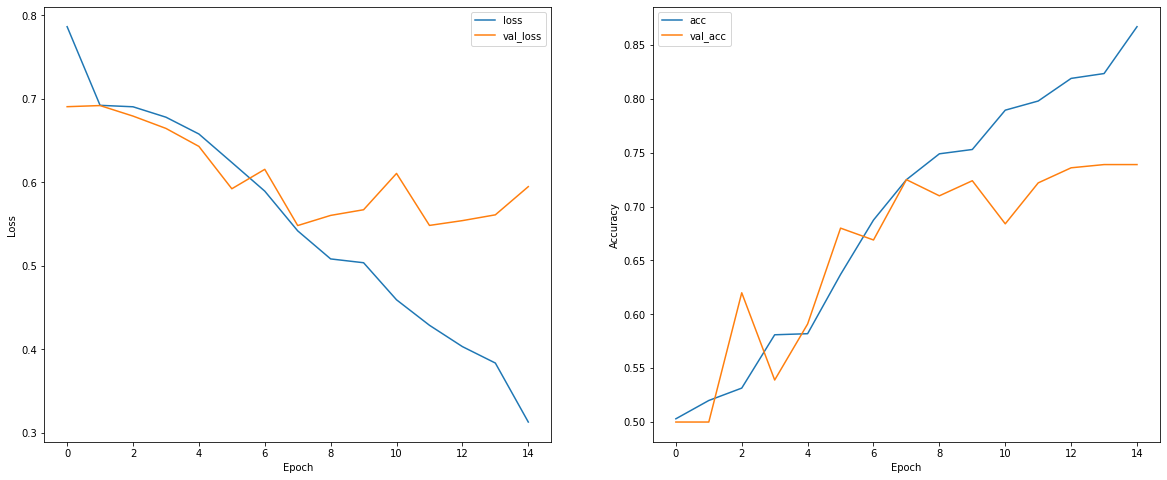

In [96]:
loss = history_original.history['loss']
val_loss = history_original.history['val_loss']
acc = history_original.history['accuracy']
val_acc = history_original.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [97]:
from google.colab import drive
drive.mount('/content/drive/')

In [98]:
model.save('/content/drive/My Drive/dataset/cats_and_dogs_small.h5')

In [99]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/My Drive/dataset/cats_and_dogs_small.h5')
model.summary() 

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 128)      

## Dropout

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

In [101]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_dropout = model.fit(train_data_gen,epochs=epochs,validation_data=val_data_gen)

Epoch 1/15
16/16 [==============================] - 11s 677ms/step - loss: 0.7637 - accuracy: 0.5120 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 2/15
16/16 [==============================] - 10s 641ms/step - loss: 0.6891 - accuracy: 0.5465 - val_loss: 0.6899 - val_accuracy: 0.5050
Epoch 3/15
16/16 [==============================] - 10s 654ms/step - loss: 0.6805 - accuracy: 0.5585 - val_loss: 0.6698 - val_accuracy: 0.5330
Epoch 4/15
16/16 [==============================] - 10s 646ms/step - loss: 0.6501 - accuracy: 0.6160 - val_loss: 0.6180 - val_accuracy: 0.6630
Epoch 5/15
16/16 [==============================] - 10s 647ms/step - loss: 0.5925 - accuracy: 0.6895 - val_loss: 0.5955 - val_accuracy: 0.7090
Epoch 6/15
16/16 [==============================] - 10s 652ms/step - loss: 0.5679 - accuracy: 0.7225 - val_loss: 0.5847 - val_accuracy: 0.6930
Epoch 7/15
16/16 [==============================] - 10s 640ms/step - loss: 0.5279 - accuracy: 0.7225 - val_loss: 0.5633 - val_accuracy: 0.7240

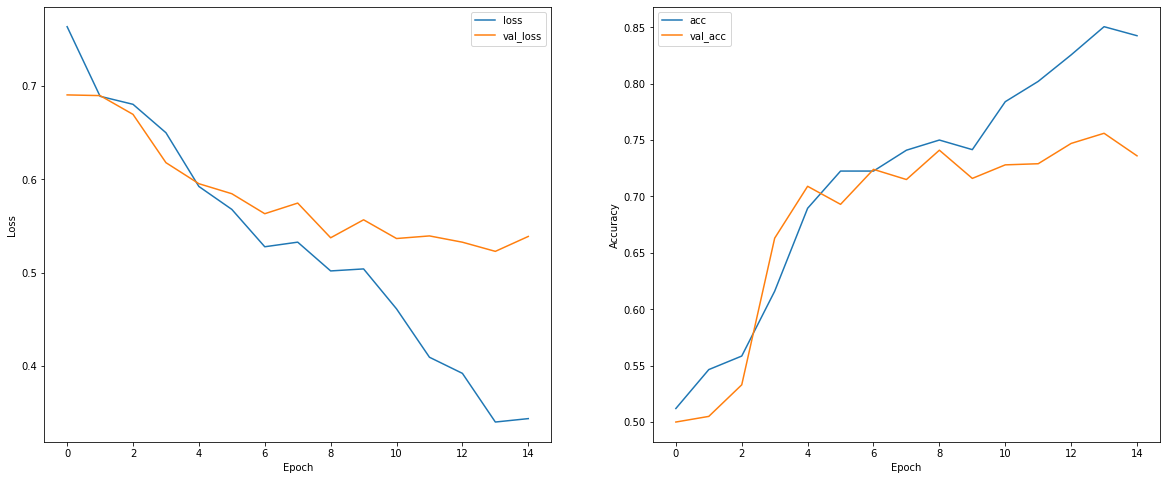

In [102]:
loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']
acc = history_dropout.history['accuracy']
val_acc = history_dropout.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Data Augumentation

In [103]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [104]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
image_gen_val = ImageDataGenerator(rescale=1./255)

In [105]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


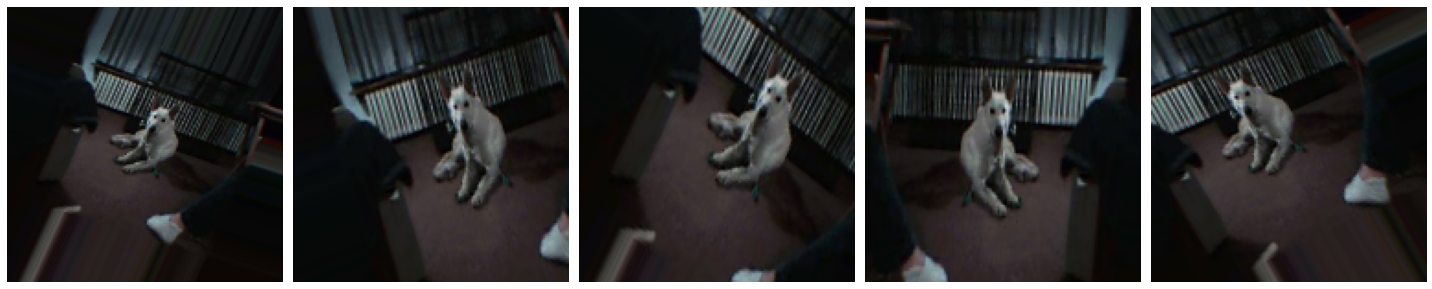

In [106]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Build the Model

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

In [108]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 18, 18, 128)      

### Train the Model

In [109]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_augmentation = model.fit(train_data_gen,epochs=epochs,validation_data=val_data_gen)

Epoch 1/15
16/16 [==============================] - 21s 1s/step - loss: 0.8191 - accuracy: 0.4955 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 2/15
16/16 [==============================] - 20s 1s/step - loss: 0.6922 - accuracy: 0.5225 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/15
16/16 [==============================] - 20s 1s/step - loss: 0.6930 - accuracy: 0.5100 - val_loss: 0.6901 - val_accuracy: 0.5680
Epoch 4/15
16/16 [==============================] - 20s 1s/step - loss: 0.6913 - accuracy: 0.5485 - val_loss: 0.6871 - val_accuracy: 0.5070
Epoch 5/15
16/16 [==============================] - 20s 1s/step - loss: 0.6881 - accuracy: 0.5270 - val_loss: 0.6803 - val_accuracy: 0.6230
Epoch 6/15
16/16 [==============================] - 20s 1s/step - loss: 0.6813 - accuracy: 0.5650 - val_loss: 0.6622 - val_accuracy: 0.5760
Epoch 7/15
16/16 [==============================] - 20s 1s/step - loss: 0.6771 - accuracy: 0.5570 - val_loss: 0.6590 - val_accuracy: 0.6040
Epoch 8/15
16/16 [==

### Evalaute the Model

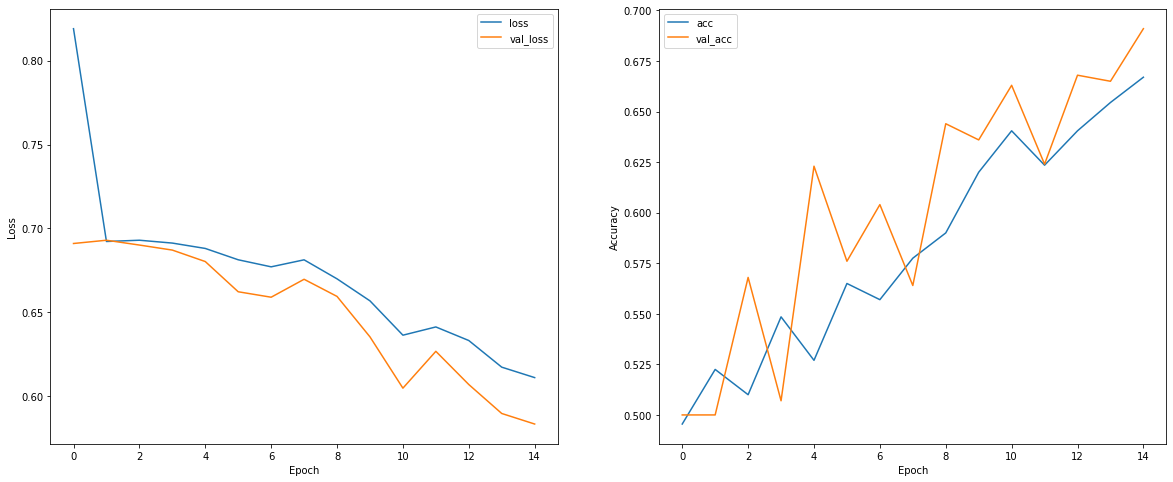

In [110]:
loss = history_augmentation.history['loss']
val_loss = history_augmentation.history['val_loss']
acc = history_augmentation.history['accuracy']
val_acc = history_augmentation.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Test the Model

In [111]:
from keras.preprocessing import image
import numpy as np

img_path = '/content/drive/My Drive/dataset/test_cat.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 150, 150, 3)


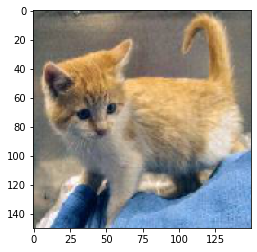

In [112]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [113]:
model.predict(img_tensor)

array([[0.6474059 , 0.35259414]], dtype=float32)

In [114]:
img_path = '/content/drive/My Drive/dataset/test_dog.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 150, 150, 3)


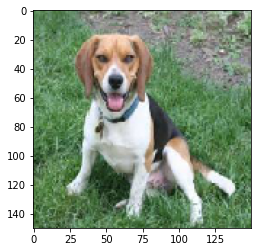

In [115]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [116]:
model.predict(img_tensor)

array([[0.05196432, 0.94803566]], dtype=float32)

## Ex: Dropout and Data Augmentation

In [117]:
import tensorflow as tf

cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [118]:
batch_size = 32
epochs = 15
IMG_HEIGHT = 32
IMG_WIDTH = 32

In [119]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen_train = ImageDataGenerator(
                    rotation_range=30,
                    width_shift_range=.30,
                    height_shift_range=.30,
                    horizontal_flip=True,
                    zoom_range=0.2,
                    rescale=None)

train_data_gen = image_gen_train.flow(x_train,y_train, batch_size=batch_size)

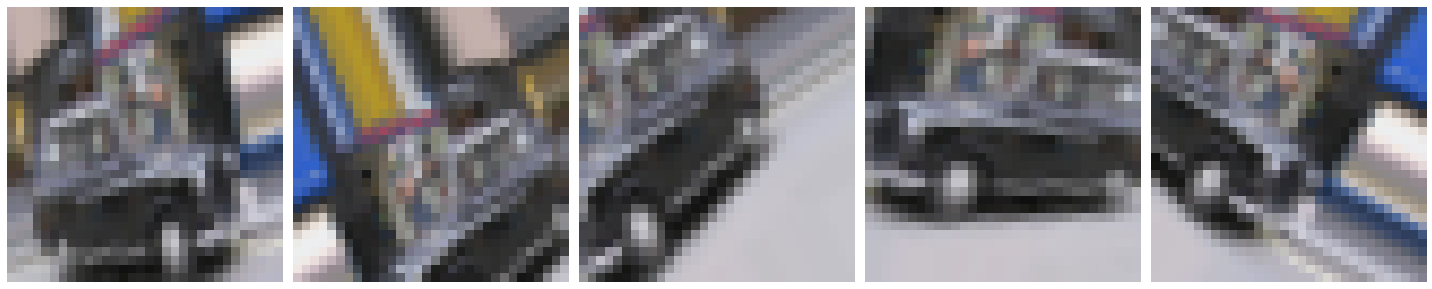

In [120]:
import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(32, 32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [122]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data_gen,epochs=epochs,validation_data=(x_test,y_test))

Epoch 1/15
1563/1563 [==============================] - 38s 24ms/step - loss: 1.8565 - accuracy: 0.0962 - val_loss: 1.6035 - val_accuracy: 0.0499
Epoch 2/15
1563/1563 [==============================] - 37s 24ms/step - loss: 1.6775 - accuracy: 0.0940 - val_loss: 1.4488 - val_accuracy: 0.0747
Epoch 3/15
1563/1563 [==============================] - 37s 24ms/step - loss: 1.5994 - accuracy: 0.0945 - val_loss: 1.3516 - val_accuracy: 0.0703
Epoch 4/15
1563/1563 [==============================] - 37s 24ms/step - loss: 1.5578 - accuracy: 0.0958 - val_loss: 1.3755 - val_accuracy: 0.0662
Epoch 5/15
1563/1563 [==============================] - 37s 24ms/step - loss: 1.5295 - accuracy: 0.0946 - val_loss: 1.4665 - val_accuracy: 0.0726
Epoch 6/15
1563/1563 [==============================] - 37s 24ms/step - loss: 1.5054 - accuracy: 0.0964 - val_loss: 1.3004 - val_accuracy: 0.0756
Epoch 7/15
1563/1563 [==============================] - 37s 24ms/step - loss: 1.4869 - accuracy: 0.0962 - val_loss: 1.2881 -

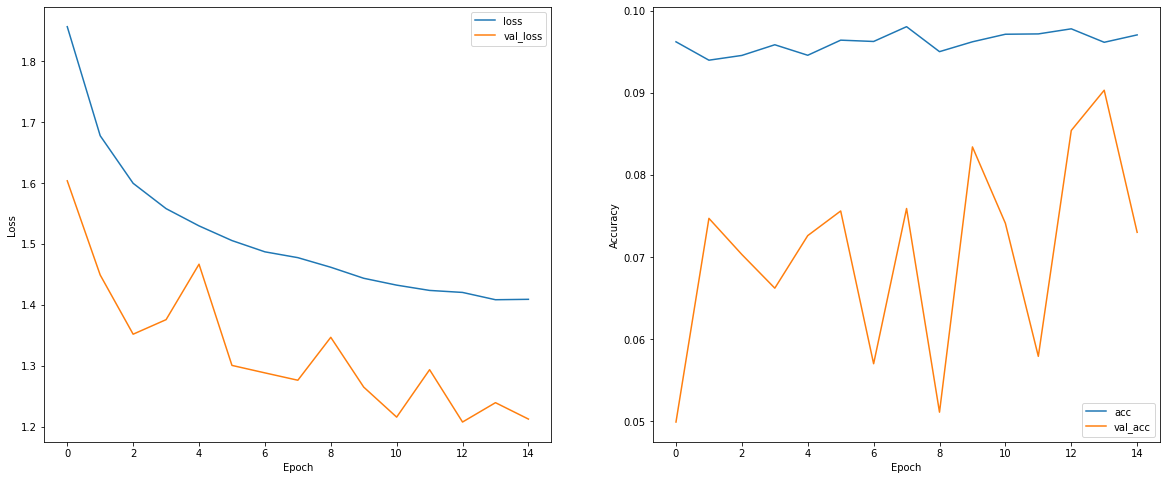

In [123]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Topic 5 Transfer Learning

## Fine Tuning and Feature Extraction

In [124]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow. keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [125]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [126]:
base_model=MobileNet(weights='imagenet',include_top=False, input_shape=(IMG_HEIGHT , IMG_WIDTH, 3)) 

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
x=Dense(512,activation='relu')(x) 
preds=Dense(2,activation='softmax')(x) 

model=Model(inputs=base_model.input,outputs=preds)

17235968/17225924 [==============================] - 1s 0us/step


In [127]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 75, 75, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 75, 75, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 75, 75, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 75, 75, 32)        0     

### Feature Extraction

In [128]:
# base_model.trainable = False

### Fine Tunning

In [129]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

### Import the Data

In [130]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
PATH

'/root/.keras/datasets/cats_and_dogs_filtered'

In [131]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [132]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [133]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [134]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
image_gen_val = ImageDataGenerator(rescale=1./255)

In [135]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [136]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_tf = model.fit(train_data_gen,epochs=epochs,validation_data=val_data_gen)

Epoch 1/15
16/16 [==============================] - 28s 1s/step - loss: 0.6293 - accuracy: 0.7980 - val_loss: 0.3015 - val_accuracy: 0.9220
Epoch 2/15
16/16 [==============================] - 21s 1s/step - loss: 0.2045 - accuracy: 0.9155 - val_loss: 1.0343 - val_accuracy: 0.8630
Epoch 3/15
16/16 [==============================] - 21s 1s/step - loss: 0.1375 - accuracy: 0.9490 - val_loss: 0.4865 - val_accuracy: 0.9230
Epoch 4/15
16/16 [==============================] - 22s 1s/step - loss: 0.1691 - accuracy: 0.9325 - val_loss: 0.1870 - val_accuracy: 0.9580
Epoch 5/15
16/16 [==============================] - 22s 1s/step - loss: 0.1585 - accuracy: 0.9405 - val_loss: 0.2100 - val_accuracy: 0.9130
Epoch 6/15
16/16 [==============================] - 22s 1s/step - loss: 0.1461 - accuracy: 0.9465 - val_loss: 0.2766 - val_accuracy: 0.9360
Epoch 7/15
16/16 [==============================] - 22s 1s/step - loss: 0.1079 - accuracy: 0.9580 - val_loss: 0.2977 - val_accuracy: 0.9350
Epoch 8/15
16/16 [==

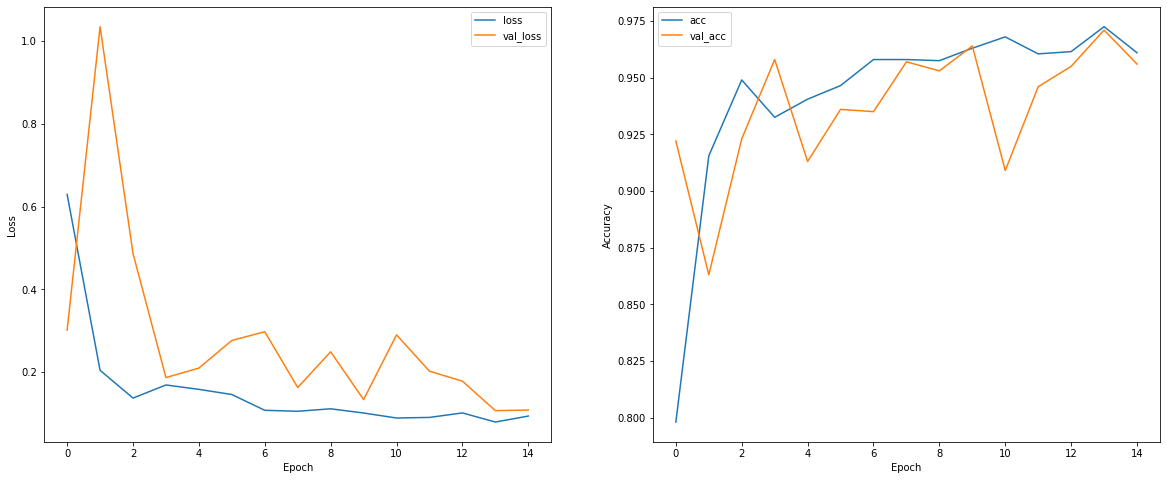

In [137]:
loss = history_tf.history['loss']
val_loss = history_tf.history['val_loss']
acc = history_tf.history['accuracy']
val_acc = history_tf.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Test the Dog Image

In [138]:
from keras.preprocessing import image
import numpy as np

img_path = '/content/drive/My Drive/dataset/test_cat.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 150, 150, 3)


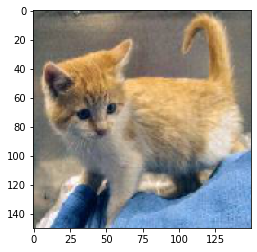

In [139]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [140]:
model.predict(img_tensor)

array([[9.9991655e-01, 8.3403327e-05]], dtype=float32)

In [141]:
img_path = '/content/drive/My Drive/dataset/test_dog.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 150, 150, 3)


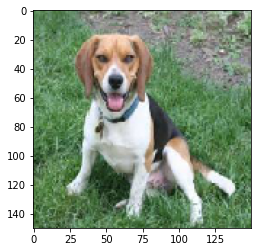

In [142]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [143]:
model.predict(img_tensor)

array([[2.7022233e-07, 9.9999976e-01]], dtype=float32)

## Tensorflow Hub

In [144]:
import tensorflow as tf
import tensorflow_hub as hub

In [145]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4" 

In [146]:
classifier = tf.keras.Sequential([hub.KerasLayer(classifier_url, input_shape=(224,224,3))])

81920/65741 [=====================================] - 0s 1us/step


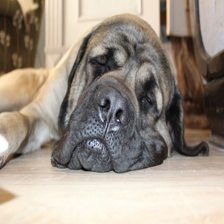

In [147]:
import numpy as np
import PIL.Image as Image

img = tf.keras.utils.get_file('image.jpg','https://images.all-free-download.com/images/graphicthumb/dogs_dog_animal_215598.jpg')
img = Image.open(img).resize((224,224))
img

In [148]:
img = np.array(img)/255.0
img.shape

(224, 224, 3)

In [149]:
result = classifier.predict(img[np.newaxis, ...])

In [150]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

244

In [151]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

24576/10484 [======================================================================] - 0s 0us/step


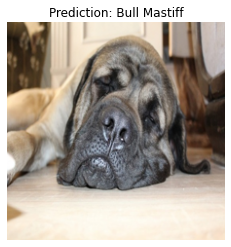

In [152]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())